**кластеризация методом k-means**


Евгений Борисов borisov.e@solarl.ru

---

## библиотеки

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance_matrix

##  загружаем данные 

In [2]:
# X = np.vstack([ 
#     np.loadtxt('data/360_9c/points_1.txt'), 
#     np.loadtxt('data/360_9c/points_2.txt'), 
#     np.loadtxt('data/360_9c/points_3.txt'), 
#     np.loadtxt('data/360_9c/points_4.txt'), 
#     np.loadtxt('data/360_9c/points_5.txt'), 
#     np.loadtxt('data/360_9c/points_6.txt'), 
#     np.loadtxt('data/360_9c/points_7.txt'), 
#     np.loadtxt('data/360_9c/points_8.txt'), 
#     np.loadtxt('data/360_9c/points_9.txt'), 
#     ])
# n_clst = 6 # количество кластеров
# n_fet = X.shape[1] # размерность пространства
# n_ex = X.shape[0] # количество точек

In [3]:
# X = np.loadtxt('data/400_1/points_9.txt')

# n_clst = 3 # количество кластеров
# n_fet = X.shape[1] # размерность пространства
# n_ex = X.shape[0] # количество точек

In [4]:
X = np.loadtxt('data/360_1/points_1.txt')

n_fet = X.shape[1] # размерность пространства
n_ex = X.shape[0] # количество точек

n_clst = 5 # количество кластеров


### рисуем данные


In [5]:
plot_frame = np.vstack( [ X.min(axis=0),X.max(axis=0) ]) + np.array([ [ -1.0,-1.0], [ 1.0,1.0] ] )*0.5
plot_size = (10,10)

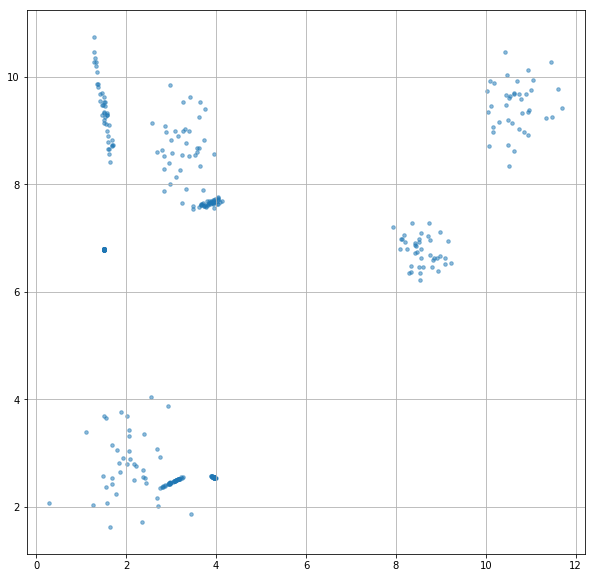

In [6]:
plt.xlim(plot_frame[:,0])
plt.ylim(plot_frame[:,1])
plt.gcf().set_size_inches(plot_size)
plt.scatter( X[:,0], X[:,1],marker='.',s=50, alpha=0.5)
plt.grid()
plt.show()

## оптимизация параметров

In [7]:
def k_means(X,mu,ii=1000):
    mu_hist = []

    for i in range(ii): 
        r = distance_matrix(X,mu) # растояние до центроидов для каждой точки
        y = np.argmin(r,axis=1) # номер кластера для каждой из точек
        Xc = [ X[(y==j),:] for j in range(n_clst) ] # разбираем точки на кластеры

        # дополняем пустые кластеры
        for j in range(n_clst):
            if Xc[j].shape[0]<1:  Xc[j] = mu[j,:].reshape(1,n_fet)
                # Xc[j] = np.random.rand(1,n_fet) * np.max(X,axis=0) * 0.9

        mu_hist.append(mu) # сохраняем старое состояние

        # пересчитываем центроиды
        mu = np.vstack( [ Xc[j].mean(axis=0) for j in range(n_clst) ] )

        # изменение центроидов
        dmu = np.abs( mu_hist[-1] - mu ).sum()
        if (dmu<1e-2): break

    return mu,mu_hist


In [8]:
# оценка результата
def clust_qual(X,mu):
    # растояние до центроидов для каждой точки
    r = distance_matrix(X,mu)
    # номер кластера для каждой из точек
    y = np.argmin(r,axis=1)
    # разбираем точки на кластеры
    Xc = [ X[(y==j),:] for j in range(n_clst) ]

    # среднее внутрикластерное расстояние
    in_d = np.mean([ distance_matrix( Xc[j], Xc[j] ).mean()*0.5 for j in range(n_clst) if Xc[j].shape[0]>0  ])

    # среднее межкластерное расстояние
    out_d = [] 
    for j in range(n_clst):
        Xcj = np.vstack( [ Xc[i] for i in range(n_clst) if i!=j ] )
        if Xc[j].shape[0]>0: out_d.append( distance_matrix( Xcj, Xc[j] ).mean() )

    out_d = np.mean(out_d)
    
    # n_clst_fact = sum([ 1 for j in range(n_clst) if Xc[j].shape[0]>0 ])
    n_clst_fact = 1.0
    
    return n_clst_fact * in_d/out_d

In [9]:
# запускаем несколько раз
# и выбираем  результат с наилучшей оценкой
mu_ = {}

for i in range(5):
    mu = np.random.rand(n_clst,n_fet) * np.max(X,axis=0) * 1.9
    mu,mu_hist = k_means(X,mu)
    q = clust_qual(X,mu)
    print(q,'\n')
    mu_.update( {q : mu}  )
    
mu = mu_[ min( mu_.keys() ) ]    

0.10776069263630982 

0.07626818589840735 

0.11875383225023592 

0.11875383225023592 

0.2488793577158325 



## результат

0.07626818589840735 

0 [2.51751934 8.13725238] (160, 2)
1 [8.5793821  6.75764958] (40, 2)
2 [10.67305905  9.457836  ] (40, 2)
3 [2.9979742  2.59887636] (120, 2)


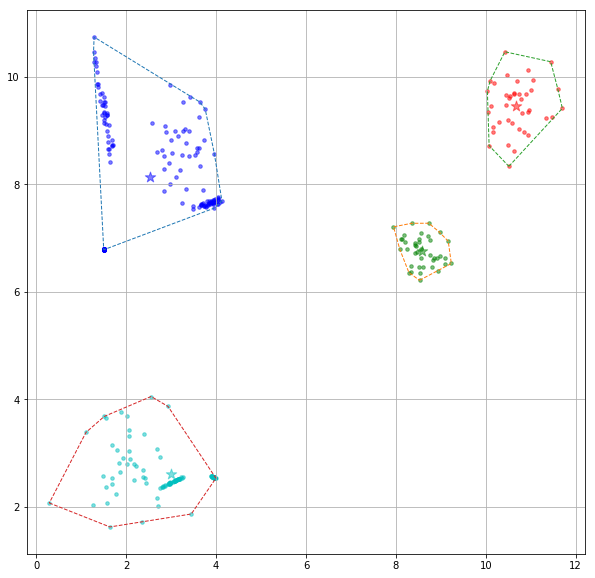

In [10]:
from scipy.spatial import ConvexHull


print ( clust_qual(X,mu),'\n' )
    
# растояние до центроидов для каждой точки
r = distance_matrix(X,mu)
# номер кластера для каждой из точек
y = np.argmin(r,axis=1)

Xc = [ X[(y==j),:] for j in range(n_clst) ]

plt.xlim(plot_frame[:,0])
plt.ylim(plot_frame[:,1])
plt.gcf().set_size_inches(plot_size)
plt.grid()

colors = [ 'b', 'g', 'r', 'c', 'm', 'y', 'k' ]

for j in range(mu.shape[0]):

    if(Xc[j].shape[0]>0):
        plt.scatter( mu[j,0], mu[j,1], marker='*',color=colors[j], s=120, alpha=0.5 )
        plt.scatter( Xc[j][:,0],  Xc[j][:,1], marker='.', color=colors[j], s=50, alpha=0.5 )
        print(j, mu[j,:],  Xc[j].shape )

        
    if( Xc[j].shape[0]>2):    
        hull = ConvexHull( Xc[j])
        v = np.append( hull.vertices, hull.vertices[0] )
        plt.plot(  Xc[j][v,0],  Xc[j][v,1], '--', lw=1)

plt.show()


---